# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse negative) of the second derivative of f(x) at x).


loss = SUM((y_hat=y)^2)


The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

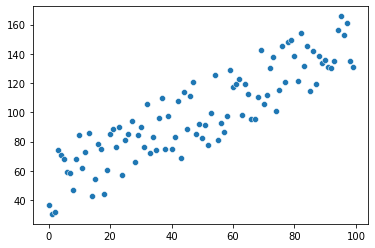

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 486.708342
Iteration 1 | Cost: 483.352795
Iteration 2 | Cost: 480.186317
Iteration 3 | Cost: 477.197939
Iteration 4 | Cost: 474.377325
Iteration 5 | Cost: 471.714740
Iteration 6 | Cost: 469.201015
Iteration 7 | Cost: 466.827512
Iteration 8 | Cost: 464.586095
Iteration 9 | Cost: 462.469099
Iteration 10 | Cost: 460.469305
Iteration 11 | Cost: 458.579913
Iteration 12 | Cost: 456.794518
Iteration 13 | Cost: 455.107084
Iteration 14 | Cost: 453.511929
Iteration 15 | Cost: 452.003699
Iteration 16 | Cost: 450.577351
Iteration 17 | Cost: 449.228133
Iteration 18 | Cost: 447.951572
Iteration 19 | Cost: 446.743452
Iteration 20 | Cost: 445.599804
Iteration 21 | Cost: 444.516886
Iteration 22 | Cost: 443.491176
Iteration 23 | Cost: 442.519356
Iteration 24 | Cost: 441.598299
Iteration 25 | Cost: 440.725062
Iteration 26 | Cost: 439.896870
Iteration 27 | Cost: 439.111111
Iteration 28 | Cost: 438.365325
Iteration 29 | Cost: 437.657192
Iteration 30 | Cost: 436.984530
Iteration 31 | Cos

Iteration 835 | Cost: 358.088375
Iteration 836 | Cost: 358.012134
Iteration 837 | Cost: 357.935917
Iteration 838 | Cost: 357.859722
Iteration 839 | Cost: 357.783551
Iteration 840 | Cost: 357.707402
Iteration 841 | Cost: 357.631277
Iteration 842 | Cost: 357.555175
Iteration 843 | Cost: 357.479097
Iteration 844 | Cost: 357.403041
Iteration 845 | Cost: 357.327009
Iteration 846 | Cost: 357.251000
Iteration 847 | Cost: 357.175014
Iteration 848 | Cost: 357.099051
Iteration 849 | Cost: 357.023111
Iteration 850 | Cost: 356.947194
Iteration 851 | Cost: 356.871301
Iteration 852 | Cost: 356.795430
Iteration 853 | Cost: 356.719583
Iteration 854 | Cost: 356.643758
Iteration 855 | Cost: 356.567957
Iteration 856 | Cost: 356.492179
Iteration 857 | Cost: 356.416424
Iteration 858 | Cost: 356.340692
Iteration 859 | Cost: 356.264983
Iteration 860 | Cost: 356.189297
Iteration 861 | Cost: 356.113634
Iteration 862 | Cost: 356.037994
Iteration 863 | Cost: 355.962377
Iteration 864 | Cost: 355.886784
Iteration 

Iteration 1428 | Cost: 316.717735
Iteration 1429 | Cost: 316.654089
Iteration 1430 | Cost: 316.590461
Iteration 1431 | Cost: 316.526854
Iteration 1432 | Cost: 316.463265
Iteration 1433 | Cost: 316.399696
Iteration 1434 | Cost: 316.336146
Iteration 1435 | Cost: 316.272616
Iteration 1436 | Cost: 316.209105
Iteration 1437 | Cost: 316.145613
Iteration 1438 | Cost: 316.082141
Iteration 1439 | Cost: 316.018688
Iteration 1440 | Cost: 315.955254
Iteration 1441 | Cost: 315.891840
Iteration 1442 | Cost: 315.828445
Iteration 1443 | Cost: 315.765069
Iteration 1444 | Cost: 315.701712
Iteration 1445 | Cost: 315.638375
Iteration 1446 | Cost: 315.575057
Iteration 1447 | Cost: 315.511759
Iteration 1448 | Cost: 315.448479
Iteration 1449 | Cost: 315.385219
Iteration 1450 | Cost: 315.321978
Iteration 1451 | Cost: 315.258757
Iteration 1452 | Cost: 315.195554
Iteration 1453 | Cost: 315.132371
Iteration 1454 | Cost: 315.069207
Iteration 1455 | Cost: 315.006062
Iteration 1456 | Cost: 314.942937
Iteration 1457

Iteration 1959 | Cost: 285.507248
Iteration 1960 | Cost: 285.453102
Iteration 1961 | Cost: 285.398974
Iteration 1962 | Cost: 285.344862
Iteration 1963 | Cost: 285.290766
Iteration 1964 | Cost: 285.236687
Iteration 1965 | Cost: 285.182624
Iteration 1966 | Cost: 285.128578
Iteration 1967 | Cost: 285.074548
Iteration 1968 | Cost: 285.020534
Iteration 1969 | Cost: 284.966538
Iteration 1970 | Cost: 284.912557
Iteration 1971 | Cost: 284.858593
Iteration 1972 | Cost: 284.804645
Iteration 1973 | Cost: 284.750714
Iteration 1974 | Cost: 284.696799
Iteration 1975 | Cost: 284.642901
Iteration 1976 | Cost: 284.589019
Iteration 1977 | Cost: 284.535153
Iteration 1978 | Cost: 284.481304
Iteration 1979 | Cost: 284.427471
Iteration 1980 | Cost: 284.373655
Iteration 1981 | Cost: 284.319855
Iteration 1982 | Cost: 284.266071
Iteration 1983 | Cost: 284.212304
Iteration 1984 | Cost: 284.158553
Iteration 1985 | Cost: 284.104819
Iteration 1986 | Cost: 284.051100
Iteration 1987 | Cost: 283.997399
Iteration 1988

Iteration 2557 | Cost: 255.900629
Iteration 2558 | Cost: 255.855497
Iteration 2559 | Cost: 255.810379
Iteration 2560 | Cost: 255.765275
Iteration 2561 | Cost: 255.720184
Iteration 2562 | Cost: 255.675107
Iteration 2563 | Cost: 255.630044
Iteration 2564 | Cost: 255.584994
Iteration 2565 | Cost: 255.539958
Iteration 2566 | Cost: 255.494936
Iteration 2567 | Cost: 255.449927
Iteration 2568 | Cost: 255.404933
Iteration 2569 | Cost: 255.359952
Iteration 2570 | Cost: 255.314984
Iteration 2571 | Cost: 255.270031
Iteration 2572 | Cost: 255.225091
Iteration 2573 | Cost: 255.180164
Iteration 2574 | Cost: 255.135252
Iteration 2575 | Cost: 255.090353
Iteration 2576 | Cost: 255.045467
Iteration 2577 | Cost: 255.000596
Iteration 2578 | Cost: 254.955738
Iteration 2579 | Cost: 254.910894
Iteration 2580 | Cost: 254.866063
Iteration 2581 | Cost: 254.821246
Iteration 2582 | Cost: 254.776442
Iteration 2583 | Cost: 254.731653
Iteration 2584 | Cost: 254.686877
Iteration 2585 | Cost: 254.642114
Iteration 2586

Iteration 3023 | Cost: 236.290054
Iteration 3024 | Cost: 236.250892
Iteration 3025 | Cost: 236.211742
Iteration 3026 | Cost: 236.172604
Iteration 3027 | Cost: 236.133478
Iteration 3028 | Cost: 236.094364
Iteration 3029 | Cost: 236.055261
Iteration 3030 | Cost: 236.016171
Iteration 3031 | Cost: 235.977092
Iteration 3032 | Cost: 235.938026
Iteration 3033 | Cost: 235.898971
Iteration 3034 | Cost: 235.859928
Iteration 3035 | Cost: 235.820897
Iteration 3036 | Cost: 235.781878
Iteration 3037 | Cost: 235.742871
Iteration 3038 | Cost: 235.703875
Iteration 3039 | Cost: 235.664892
Iteration 3040 | Cost: 235.625920
Iteration 3041 | Cost: 235.586961
Iteration 3042 | Cost: 235.548013
Iteration 3043 | Cost: 235.509077
Iteration 3044 | Cost: 235.470153
Iteration 3045 | Cost: 235.431240
Iteration 3046 | Cost: 235.392340
Iteration 3047 | Cost: 235.353451
Iteration 3048 | Cost: 235.314574
Iteration 3049 | Cost: 235.275710
Iteration 3050 | Cost: 235.236856
Iteration 3051 | Cost: 235.198015
Iteration 3052

Iteration 3363 | Cost: 223.639099
Iteration 3364 | Cost: 223.603788
Iteration 3365 | Cost: 223.568488
Iteration 3366 | Cost: 223.533199
Iteration 3367 | Cost: 223.497921
Iteration 3368 | Cost: 223.462653
Iteration 3369 | Cost: 223.427397
Iteration 3370 | Cost: 223.392150
Iteration 3371 | Cost: 223.356915
Iteration 3372 | Cost: 223.321690
Iteration 3373 | Cost: 223.286476
Iteration 3374 | Cost: 223.251273
Iteration 3375 | Cost: 223.216081
Iteration 3376 | Cost: 223.180899
Iteration 3377 | Cost: 223.145728
Iteration 3378 | Cost: 223.110567
Iteration 3379 | Cost: 223.075418
Iteration 3380 | Cost: 223.040279
Iteration 3381 | Cost: 223.005150
Iteration 3382 | Cost: 222.970033
Iteration 3383 | Cost: 222.934926
Iteration 3384 | Cost: 222.899830
Iteration 3385 | Cost: 222.864744
Iteration 3386 | Cost: 222.829669
Iteration 3387 | Cost: 222.794605
Iteration 3388 | Cost: 222.759552
Iteration 3389 | Cost: 222.724509
Iteration 3390 | Cost: 222.689477
Iteration 3391 | Cost: 222.654455
Iteration 3392

Iteration 3765 | Cost: 210.276549
Iteration 3766 | Cost: 210.245306
Iteration 3767 | Cost: 210.214073
Iteration 3768 | Cost: 210.182849
Iteration 3769 | Cost: 210.151635
Iteration 3770 | Cost: 210.120431
Iteration 3771 | Cost: 210.089236
Iteration 3772 | Cost: 210.058050
Iteration 3773 | Cost: 210.026874
Iteration 3774 | Cost: 209.995707
Iteration 3775 | Cost: 209.964550
Iteration 3776 | Cost: 209.933403
Iteration 3777 | Cost: 209.902264
Iteration 3778 | Cost: 209.871136
Iteration 3779 | Cost: 209.840017
Iteration 3780 | Cost: 209.808907
Iteration 3781 | Cost: 209.777807
Iteration 3782 | Cost: 209.746716
Iteration 3783 | Cost: 209.715634
Iteration 3784 | Cost: 209.684563
Iteration 3785 | Cost: 209.653500
Iteration 3786 | Cost: 209.622447
Iteration 3787 | Cost: 209.591404
Iteration 3788 | Cost: 209.560370
Iteration 3789 | Cost: 209.529345
Iteration 3790 | Cost: 209.498330
Iteration 3791 | Cost: 209.467324
Iteration 3792 | Cost: 209.436328
Iteration 3793 | Cost: 209.405341
Iteration 3794

Iteration 4021 | Cost: 202.581035
Iteration 4022 | Cost: 202.552135
Iteration 4023 | Cost: 202.523244
Iteration 4024 | Cost: 202.494361
Iteration 4025 | Cost: 202.465488
Iteration 4026 | Cost: 202.436623
Iteration 4027 | Cost: 202.407767
Iteration 4028 | Cost: 202.378920
Iteration 4029 | Cost: 202.350082
Iteration 4030 | Cost: 202.321252
Iteration 4031 | Cost: 202.292432
Iteration 4032 | Cost: 202.263620
Iteration 4033 | Cost: 202.234816
Iteration 4034 | Cost: 202.206022
Iteration 4035 | Cost: 202.177236
Iteration 4036 | Cost: 202.148459
Iteration 4037 | Cost: 202.119691
Iteration 4038 | Cost: 202.090932
Iteration 4039 | Cost: 202.062181
Iteration 4040 | Cost: 202.033439
Iteration 4041 | Cost: 202.004706
Iteration 4042 | Cost: 201.975981
Iteration 4043 | Cost: 201.947266
Iteration 4044 | Cost: 201.918559
Iteration 4045 | Cost: 201.889861
Iteration 4046 | Cost: 201.861171
Iteration 4047 | Cost: 201.832490
Iteration 4048 | Cost: 201.803818
Iteration 4049 | Cost: 201.775155
Iteration 4050

Iteration 4830 | Cost: 181.854828
Iteration 4831 | Cost: 181.832237
Iteration 4832 | Cost: 181.809654
Iteration 4833 | Cost: 181.787078
Iteration 4834 | Cost: 181.764508
Iteration 4835 | Cost: 181.741945
Iteration 4836 | Cost: 181.719390
Iteration 4837 | Cost: 181.696841
Iteration 4838 | Cost: 181.674299
Iteration 4839 | Cost: 181.651763
Iteration 4840 | Cost: 181.629235
Iteration 4841 | Cost: 181.606713
Iteration 4842 | Cost: 181.584199
Iteration 4843 | Cost: 181.561691
Iteration 4844 | Cost: 181.539190
Iteration 4845 | Cost: 181.516696
Iteration 4846 | Cost: 181.494209
Iteration 4847 | Cost: 181.471728
Iteration 4848 | Cost: 181.449255
Iteration 4849 | Cost: 181.426788
Iteration 4850 | Cost: 181.404328
Iteration 4851 | Cost: 181.381875
Iteration 4852 | Cost: 181.359429
Iteration 4853 | Cost: 181.336990
Iteration 4854 | Cost: 181.314557
Iteration 4855 | Cost: 181.292131
Iteration 4856 | Cost: 181.269712
Iteration 4857 | Cost: 181.247300
Iteration 4858 | Cost: 181.224895
Iteration 4859

Iteration 5628 | Cost: 165.848350
Iteration 5629 | Cost: 165.830633
Iteration 5630 | Cost: 165.812921
Iteration 5631 | Cost: 165.795215
Iteration 5632 | Cost: 165.777513
Iteration 5633 | Cost: 165.759818
Iteration 5634 | Cost: 165.742127
Iteration 5635 | Cost: 165.724442
Iteration 5636 | Cost: 165.706763
Iteration 5637 | Cost: 165.689088
Iteration 5638 | Cost: 165.671420
Iteration 5639 | Cost: 165.653756
Iteration 5640 | Cost: 165.636098
Iteration 5641 | Cost: 165.618445
Iteration 5642 | Cost: 165.600798
Iteration 5643 | Cost: 165.583156
Iteration 5644 | Cost: 165.565519
Iteration 5645 | Cost: 165.547888
Iteration 5646 | Cost: 165.530262
Iteration 5647 | Cost: 165.512642
Iteration 5648 | Cost: 165.495027
Iteration 5649 | Cost: 165.477417
Iteration 5650 | Cost: 165.459813
Iteration 5651 | Cost: 165.442214
Iteration 5652 | Cost: 165.424620
Iteration 5653 | Cost: 165.407032
Iteration 5654 | Cost: 165.389449
Iteration 5655 | Cost: 165.371871
Iteration 5656 | Cost: 165.354299
Iteration 5657

Iteration 5953 | Cost: 160.365112
Iteration 5954 | Cost: 160.349064
Iteration 5955 | Cost: 160.333021
Iteration 5956 | Cost: 160.316983
Iteration 5957 | Cost: 160.300949
Iteration 5958 | Cost: 160.284921
Iteration 5959 | Cost: 160.268897
Iteration 5960 | Cost: 160.252878
Iteration 5961 | Cost: 160.236865
Iteration 5962 | Cost: 160.220855
Iteration 5963 | Cost: 160.204851
Iteration 5964 | Cost: 160.188852
Iteration 5965 | Cost: 160.172858
Iteration 5966 | Cost: 160.156868
Iteration 5967 | Cost: 160.140883
Iteration 5968 | Cost: 160.124904
Iteration 5969 | Cost: 160.108929
Iteration 5970 | Cost: 160.092959
Iteration 5971 | Cost: 160.076993
Iteration 5972 | Cost: 160.061033
Iteration 5973 | Cost: 160.045078
Iteration 5974 | Cost: 160.029127
Iteration 5975 | Cost: 160.013181
Iteration 5976 | Cost: 159.997240
Iteration 5977 | Cost: 159.981304
Iteration 5978 | Cost: 159.965373
Iteration 5979 | Cost: 159.949447
Iteration 5980 | Cost: 159.933525
Iteration 5981 | Cost: 159.917608
Iteration 5982

Iteration 6637 | Cost: 150.454376
Iteration 6638 | Cost: 150.441345
Iteration 6639 | Cost: 150.428318
Iteration 6640 | Cost: 150.415295
Iteration 6641 | Cost: 150.402276
Iteration 6642 | Cost: 150.389261
Iteration 6643 | Cost: 150.376249
Iteration 6644 | Cost: 150.363242
Iteration 6645 | Cost: 150.350239
Iteration 6646 | Cost: 150.337240
Iteration 6647 | Cost: 150.324245
Iteration 6648 | Cost: 150.311253
Iteration 6649 | Cost: 150.298266
Iteration 6650 | Cost: 150.285282
Iteration 6651 | Cost: 150.272303
Iteration 6652 | Cost: 150.259327
Iteration 6653 | Cost: 150.246356
Iteration 6654 | Cost: 150.233388
Iteration 6655 | Cost: 150.220425
Iteration 6656 | Cost: 150.207465
Iteration 6657 | Cost: 150.194509
Iteration 6658 | Cost: 150.181557
Iteration 6659 | Cost: 150.168609
Iteration 6660 | Cost: 150.155666
Iteration 6661 | Cost: 150.142726
Iteration 6662 | Cost: 150.129789
Iteration 6663 | Cost: 150.116857
Iteration 6664 | Cost: 150.103929
Iteration 6665 | Cost: 150.091005
Iteration 6666

Iteration 7328 | Cost: 142.332914
Iteration 7329 | Cost: 142.322356
Iteration 7330 | Cost: 142.311800
Iteration 7331 | Cost: 142.301248
Iteration 7332 | Cost: 142.290700
Iteration 7333 | Cost: 142.280154
Iteration 7334 | Cost: 142.269611
Iteration 7335 | Cost: 142.259072
Iteration 7336 | Cost: 142.248536
Iteration 7337 | Cost: 142.238003
Iteration 7338 | Cost: 142.227474
Iteration 7339 | Cost: 142.216947
Iteration 7340 | Cost: 142.206424
Iteration 7341 | Cost: 142.195904
Iteration 7342 | Cost: 142.185387
Iteration 7343 | Cost: 142.174874
Iteration 7344 | Cost: 142.164363
Iteration 7345 | Cost: 142.153856
Iteration 7346 | Cost: 142.143352
Iteration 7347 | Cost: 142.132851
Iteration 7348 | Cost: 142.122354
Iteration 7349 | Cost: 142.111859
Iteration 7350 | Cost: 142.101368
Iteration 7351 | Cost: 142.090880
Iteration 7352 | Cost: 142.080395
Iteration 7353 | Cost: 142.069913
Iteration 7354 | Cost: 142.059435
Iteration 7355 | Cost: 142.048960
Iteration 7356 | Cost: 142.038488
Iteration 7357

Iteration 8076 | Cost: 135.268862
Iteration 8077 | Cost: 135.260454
Iteration 8078 | Cost: 135.252048
Iteration 8079 | Cost: 135.243645
Iteration 8080 | Cost: 135.235245
Iteration 8081 | Cost: 135.226847
Iteration 8082 | Cost: 135.218452
Iteration 8083 | Cost: 135.210059
Iteration 8084 | Cost: 135.201669
Iteration 8085 | Cost: 135.193282
Iteration 8086 | Cost: 135.184897
Iteration 8087 | Cost: 135.176514
Iteration 8088 | Cost: 135.168134
Iteration 8089 | Cost: 135.159757
Iteration 8090 | Cost: 135.151382
Iteration 8091 | Cost: 135.143010
Iteration 8092 | Cost: 135.134640
Iteration 8093 | Cost: 135.126273
Iteration 8094 | Cost: 135.117908
Iteration 8095 | Cost: 135.109546
Iteration 8096 | Cost: 135.101187
Iteration 8097 | Cost: 135.092830
Iteration 8098 | Cost: 135.084476
Iteration 8099 | Cost: 135.076124
Iteration 8100 | Cost: 135.067774
Iteration 8101 | Cost: 135.059428
Iteration 8102 | Cost: 135.051083
Iteration 8103 | Cost: 135.042742
Iteration 8104 | Cost: 135.034402
Iteration 8105

Iteration 8625 | Cost: 131.017391
Iteration 8626 | Cost: 131.010277
Iteration 8627 | Cost: 131.003166
Iteration 8628 | Cost: 130.996056
Iteration 8629 | Cost: 130.988949
Iteration 8630 | Cost: 130.981844
Iteration 8631 | Cost: 130.974741
Iteration 8632 | Cost: 130.967640
Iteration 8633 | Cost: 130.960542
Iteration 8634 | Cost: 130.953445
Iteration 8635 | Cost: 130.946351
Iteration 8636 | Cost: 130.939259
Iteration 8637 | Cost: 130.932169
Iteration 8638 | Cost: 130.925081
Iteration 8639 | Cost: 130.917995
Iteration 8640 | Cost: 130.910912
Iteration 8641 | Cost: 130.903831
Iteration 8642 | Cost: 130.896751
Iteration 8643 | Cost: 130.889674
Iteration 8644 | Cost: 130.882600
Iteration 8645 | Cost: 130.875527
Iteration 8646 | Cost: 130.868456
Iteration 8647 | Cost: 130.861388
Iteration 8648 | Cost: 130.854322
Iteration 8649 | Cost: 130.847258
Iteration 8650 | Cost: 130.840196
Iteration 8651 | Cost: 130.833136
Iteration 8652 | Cost: 130.826078
Iteration 8653 | Cost: 130.819023
Iteration 8654

Iteration 9068 | Cost: 128.068851
Iteration 9069 | Cost: 128.062635
Iteration 9070 | Cost: 128.056421
Iteration 9071 | Cost: 128.050209
Iteration 9072 | Cost: 128.043998
Iteration 9073 | Cost: 128.037790
Iteration 9074 | Cost: 128.031583
Iteration 9075 | Cost: 128.025378
Iteration 9076 | Cost: 128.019176
Iteration 9077 | Cost: 128.012975
Iteration 9078 | Cost: 128.006775
Iteration 9079 | Cost: 128.000578
Iteration 9080 | Cost: 127.994383
Iteration 9081 | Cost: 127.988190
Iteration 9082 | Cost: 127.981998
Iteration 9083 | Cost: 127.975808
Iteration 9084 | Cost: 127.969621
Iteration 9085 | Cost: 127.963435
Iteration 9086 | Cost: 127.957251
Iteration 9087 | Cost: 127.951068
Iteration 9088 | Cost: 127.944888
Iteration 9089 | Cost: 127.938710
Iteration 9090 | Cost: 127.932533
Iteration 9091 | Cost: 127.926359
Iteration 9092 | Cost: 127.920186
Iteration 9093 | Cost: 127.914015
Iteration 9094 | Cost: 127.907846
Iteration 9095 | Cost: 127.901679
Iteration 9096 | Cost: 127.895514
Iteration 9097

Iteration 10326 | Cost: 121.571407
Iteration 10327 | Cost: 121.567169
Iteration 10328 | Cost: 121.562932
Iteration 10329 | Cost: 121.558697
Iteration 10330 | Cost: 121.554463
Iteration 10331 | Cost: 121.550230
Iteration 10332 | Cost: 121.545998
Iteration 10333 | Cost: 121.541768
Iteration 10334 | Cost: 121.537539
Iteration 10335 | Cost: 121.533311
Iteration 10336 | Cost: 121.529084
Iteration 10337 | Cost: 121.524859
Iteration 10338 | Cost: 121.520635
Iteration 10339 | Cost: 121.516413
Iteration 10340 | Cost: 121.512191
Iteration 10341 | Cost: 121.507971
Iteration 10342 | Cost: 121.503753
Iteration 10343 | Cost: 121.499535
Iteration 10344 | Cost: 121.495319
Iteration 10345 | Cost: 121.491104
Iteration 10346 | Cost: 121.486890
Iteration 10347 | Cost: 121.482678
Iteration 10348 | Cost: 121.478467
Iteration 10349 | Cost: 121.474257
Iteration 10350 | Cost: 121.470049
Iteration 10351 | Cost: 121.465841
Iteration 10352 | Cost: 121.461635
Iteration 10353 | Cost: 121.457431
Iteration 10354 | Co

Iteration 11285 | Cost: 118.046149
Iteration 11286 | Cost: 118.042985
Iteration 11287 | Cost: 118.039821
Iteration 11288 | Cost: 118.036658
Iteration 11289 | Cost: 118.033496
Iteration 11290 | Cost: 118.030335
Iteration 11291 | Cost: 118.027175
Iteration 11292 | Cost: 118.024015
Iteration 11293 | Cost: 118.020857
Iteration 11294 | Cost: 118.017700
Iteration 11295 | Cost: 118.014544
Iteration 11296 | Cost: 118.011389
Iteration 11297 | Cost: 118.008234
Iteration 11298 | Cost: 118.005081
Iteration 11299 | Cost: 118.001928
Iteration 11300 | Cost: 117.998777
Iteration 11301 | Cost: 117.995627
Iteration 11302 | Cost: 117.992477
Iteration 11303 | Cost: 117.989329
Iteration 11304 | Cost: 117.986181
Iteration 11305 | Cost: 117.983034
Iteration 11306 | Cost: 117.979889
Iteration 11307 | Cost: 117.976744
Iteration 11308 | Cost: 117.973600
Iteration 11309 | Cost: 117.970457
Iteration 11310 | Cost: 117.967315
Iteration 11311 | Cost: 117.964175
Iteration 11312 | Cost: 117.961035
Iteration 11313 | Co

Iteration 11825 | Cost: 116.469972
Iteration 11826 | Cost: 116.467287
Iteration 11827 | Cost: 116.464603
Iteration 11828 | Cost: 116.461919
Iteration 11829 | Cost: 116.459237
Iteration 11830 | Cost: 116.456555
Iteration 11831 | Cost: 116.453874
Iteration 11832 | Cost: 116.451194
Iteration 11833 | Cost: 116.448514
Iteration 11834 | Cost: 116.445836
Iteration 11835 | Cost: 116.443158
Iteration 11836 | Cost: 116.440481
Iteration 11837 | Cost: 116.437805
Iteration 11838 | Cost: 116.435130
Iteration 11839 | Cost: 116.432455
Iteration 11840 | Cost: 116.429782
Iteration 11841 | Cost: 116.427109
Iteration 11842 | Cost: 116.424437
Iteration 11843 | Cost: 116.421766
Iteration 11844 | Cost: 116.419095
Iteration 11845 | Cost: 116.416426
Iteration 11846 | Cost: 116.413757
Iteration 11847 | Cost: 116.411089
Iteration 11848 | Cost: 116.408422
Iteration 11849 | Cost: 116.405756
Iteration 11850 | Cost: 116.403090
Iteration 11851 | Cost: 116.400425
Iteration 11852 | Cost: 116.397762
Iteration 11853 | Co

Iteration 12724 | Cost: 114.357963
Iteration 12725 | Cost: 114.355921
Iteration 12726 | Cost: 114.353880
Iteration 12727 | Cost: 114.351839
Iteration 12728 | Cost: 114.349799
Iteration 12729 | Cost: 114.347759
Iteration 12730 | Cost: 114.345720
Iteration 12731 | Cost: 114.343682
Iteration 12732 | Cost: 114.341644
Iteration 12733 | Cost: 114.339607
Iteration 12734 | Cost: 114.337570
Iteration 12735 | Cost: 114.335534
Iteration 12736 | Cost: 114.333499
Iteration 12737 | Cost: 114.331465
Iteration 12738 | Cost: 114.329431
Iteration 12739 | Cost: 114.327397
Iteration 12740 | Cost: 114.325364
Iteration 12741 | Cost: 114.323332
Iteration 12742 | Cost: 114.321301
Iteration 12743 | Cost: 114.319270
Iteration 12744 | Cost: 114.317239
Iteration 12745 | Cost: 114.315210
Iteration 12746 | Cost: 114.313181
Iteration 12747 | Cost: 114.311152
Iteration 12748 | Cost: 114.309124
Iteration 12749 | Cost: 114.307097
Iteration 12750 | Cost: 114.305070
Iteration 12751 | Cost: 114.303044
Iteration 12752 | Co

Iteration 13290 | Cost: 113.296086
Iteration 13291 | Cost: 113.294367
Iteration 13292 | Cost: 113.292649
Iteration 13293 | Cost: 113.290931
Iteration 13294 | Cost: 113.289214
Iteration 13295 | Cost: 113.287497
Iteration 13296 | Cost: 113.285781
Iteration 13297 | Cost: 113.284065
Iteration 13298 | Cost: 113.282350
Iteration 13299 | Cost: 113.280635
Iteration 13300 | Cost: 113.278921
Iteration 13301 | Cost: 113.277208
Iteration 13302 | Cost: 113.275494
Iteration 13303 | Cost: 113.273782
Iteration 13304 | Cost: 113.272070
Iteration 13305 | Cost: 113.270358
Iteration 13306 | Cost: 113.268647
Iteration 13307 | Cost: 113.266937
Iteration 13308 | Cost: 113.265227
Iteration 13309 | Cost: 113.263517
Iteration 13310 | Cost: 113.261809
Iteration 13311 | Cost: 113.260100
Iteration 13312 | Cost: 113.258392
Iteration 13313 | Cost: 113.256685
Iteration 13314 | Cost: 113.254978
Iteration 13315 | Cost: 113.253272
Iteration 13316 | Cost: 113.251566
Iteration 13317 | Cost: 113.249861
Iteration 13318 | Co

Iteration 13684 | Cost: 112.657814
Iteration 13685 | Cost: 112.656289
Iteration 13686 | Cost: 112.654765
Iteration 13687 | Cost: 112.653242
Iteration 13688 | Cost: 112.651719
Iteration 13689 | Cost: 112.650196
Iteration 13690 | Cost: 112.648674
Iteration 13691 | Cost: 112.647152
Iteration 13692 | Cost: 112.645631
Iteration 13693 | Cost: 112.644110
Iteration 13694 | Cost: 112.642590
Iteration 13695 | Cost: 112.641070
Iteration 13696 | Cost: 112.639550
Iteration 13697 | Cost: 112.638031
Iteration 13698 | Cost: 112.636513
Iteration 13699 | Cost: 112.634995
Iteration 13700 | Cost: 112.633477
Iteration 13701 | Cost: 112.631960
Iteration 13702 | Cost: 112.630444
Iteration 13703 | Cost: 112.628927
Iteration 13704 | Cost: 112.627412
Iteration 13705 | Cost: 112.625896
Iteration 13706 | Cost: 112.624382
Iteration 13707 | Cost: 112.622867
Iteration 13708 | Cost: 112.621353
Iteration 13709 | Cost: 112.619840
Iteration 13710 | Cost: 112.618327
Iteration 13711 | Cost: 112.616814
Iteration 13712 | Co

Iteration 14323 | Cost: 111.772420
Iteration 14324 | Cost: 111.771165
Iteration 14325 | Cost: 111.769910
Iteration 14326 | Cost: 111.768656
Iteration 14327 | Cost: 111.767402
Iteration 14328 | Cost: 111.766149
Iteration 14329 | Cost: 111.764896
Iteration 14330 | Cost: 111.763643
Iteration 14331 | Cost: 111.762391
Iteration 14332 | Cost: 111.761139
Iteration 14333 | Cost: 111.759887
Iteration 14334 | Cost: 111.758636
Iteration 14335 | Cost: 111.757385
Iteration 14336 | Cost: 111.756135
Iteration 14337 | Cost: 111.754885
Iteration 14338 | Cost: 111.753635
Iteration 14339 | Cost: 111.752386
Iteration 14340 | Cost: 111.751137
Iteration 14341 | Cost: 111.749889
Iteration 14342 | Cost: 111.748640
Iteration 14343 | Cost: 111.747393
Iteration 14344 | Cost: 111.746145
Iteration 14345 | Cost: 111.744898
Iteration 14346 | Cost: 111.743652
Iteration 14347 | Cost: 111.742406
Iteration 14348 | Cost: 111.741160
Iteration 14349 | Cost: 111.739914
Iteration 14350 | Cost: 111.738669
Iteration 14351 | Co

Iteration 14679 | Cost: 111.348945
Iteration 14680 | Cost: 111.347819
Iteration 14681 | Cost: 111.346693
Iteration 14682 | Cost: 111.345568
Iteration 14683 | Cost: 111.344443
Iteration 14684 | Cost: 111.343318
Iteration 14685 | Cost: 111.342193
Iteration 14686 | Cost: 111.341069
Iteration 14687 | Cost: 111.339946
Iteration 14688 | Cost: 111.338823
Iteration 14689 | Cost: 111.337700
Iteration 14690 | Cost: 111.336577
Iteration 14691 | Cost: 111.335455
Iteration 14692 | Cost: 111.334333
Iteration 14693 | Cost: 111.333211
Iteration 14694 | Cost: 111.332090
Iteration 14695 | Cost: 111.330969
Iteration 14696 | Cost: 111.329848
Iteration 14697 | Cost: 111.328728
Iteration 14698 | Cost: 111.327608
Iteration 14699 | Cost: 111.326489
Iteration 14700 | Cost: 111.325369
Iteration 14701 | Cost: 111.324250
Iteration 14702 | Cost: 111.323132
Iteration 14703 | Cost: 111.322014
Iteration 14704 | Cost: 111.320896
Iteration 14705 | Cost: 111.319778
Iteration 14706 | Cost: 111.318661
Iteration 14707 | Co

Iteration 15037 | Cost: 110.966951
Iteration 15038 | Cost: 110.965941
Iteration 15039 | Cost: 110.964932
Iteration 15040 | Cost: 110.963923
Iteration 15041 | Cost: 110.962914
Iteration 15042 | Cost: 110.961905
Iteration 15043 | Cost: 110.960897
Iteration 15044 | Cost: 110.959889
Iteration 15045 | Cost: 110.958881
Iteration 15046 | Cost: 110.957874
Iteration 15047 | Cost: 110.956867
Iteration 15048 | Cost: 110.955860
Iteration 15049 | Cost: 110.954854
Iteration 15050 | Cost: 110.953848
Iteration 15051 | Cost: 110.952842
Iteration 15052 | Cost: 110.951837
Iteration 15053 | Cost: 110.950831
Iteration 15054 | Cost: 110.949827
Iteration 15055 | Cost: 110.948822
Iteration 15056 | Cost: 110.947818
Iteration 15057 | Cost: 110.946814
Iteration 15058 | Cost: 110.945810
Iteration 15059 | Cost: 110.944807
Iteration 15060 | Cost: 110.943804
Iteration 15061 | Cost: 110.942801
Iteration 15062 | Cost: 110.941799
Iteration 15063 | Cost: 110.940797
Iteration 15064 | Cost: 110.939795
Iteration 15065 | Co

Iteration 15355 | Cost: 110.660853
Iteration 15356 | Cost: 110.659936
Iteration 15357 | Cost: 110.659020
Iteration 15358 | Cost: 110.658104
Iteration 15359 | Cost: 110.657188
Iteration 15360 | Cost: 110.656273
Iteration 15361 | Cost: 110.655358
Iteration 15362 | Cost: 110.654443
Iteration 15363 | Cost: 110.653528
Iteration 15364 | Cost: 110.652614
Iteration 15365 | Cost: 110.651700
Iteration 15366 | Cost: 110.650786
Iteration 15367 | Cost: 110.649872
Iteration 15368 | Cost: 110.648959
Iteration 15369 | Cost: 110.648046
Iteration 15370 | Cost: 110.647133
Iteration 15371 | Cost: 110.646221
Iteration 15372 | Cost: 110.645309
Iteration 15373 | Cost: 110.644397
Iteration 15374 | Cost: 110.643485
Iteration 15375 | Cost: 110.642574
Iteration 15376 | Cost: 110.641663
Iteration 15377 | Cost: 110.640752
Iteration 15378 | Cost: 110.639842
Iteration 15379 | Cost: 110.638932
Iteration 15380 | Cost: 110.638022
Iteration 15381 | Cost: 110.637112
Iteration 15382 | Cost: 110.636203
Iteration 15383 | Co

Iteration 15977 | Cost: 110.141391
Iteration 15978 | Cost: 110.140633
Iteration 15979 | Cost: 110.139874
Iteration 15980 | Cost: 110.139116
Iteration 15981 | Cost: 110.138359
Iteration 15982 | Cost: 110.137601
Iteration 15983 | Cost: 110.136844
Iteration 15984 | Cost: 110.136087
Iteration 15985 | Cost: 110.135330
Iteration 15986 | Cost: 110.134573
Iteration 15987 | Cost: 110.133817
Iteration 15988 | Cost: 110.133061
Iteration 15989 | Cost: 110.132305
Iteration 15990 | Cost: 110.131549
Iteration 15991 | Cost: 110.130794
Iteration 15992 | Cost: 110.130039
Iteration 15993 | Cost: 110.129284
Iteration 15994 | Cost: 110.128529
Iteration 15995 | Cost: 110.127774
Iteration 15996 | Cost: 110.127020
Iteration 15997 | Cost: 110.126266
Iteration 15998 | Cost: 110.125512
Iteration 15999 | Cost: 110.124758
Iteration 16000 | Cost: 110.124005
Iteration 16001 | Cost: 110.123252
Iteration 16002 | Cost: 110.122499
Iteration 16003 | Cost: 110.121746
Iteration 16004 | Cost: 110.120994
Iteration 16005 | Co

Iteration 16878 | Cost: 109.543661
Iteration 16879 | Cost: 109.543084
Iteration 16880 | Cost: 109.542508
Iteration 16881 | Cost: 109.541932
Iteration 16882 | Cost: 109.541356
Iteration 16883 | Cost: 109.540780
Iteration 16884 | Cost: 109.540205
Iteration 16885 | Cost: 109.539629
Iteration 16886 | Cost: 109.539054
Iteration 16887 | Cost: 109.538479
Iteration 16888 | Cost: 109.537904
Iteration 16889 | Cost: 109.537329
Iteration 16890 | Cost: 109.536755
Iteration 16891 | Cost: 109.536180
Iteration 16892 | Cost: 109.535606
Iteration 16893 | Cost: 109.535032
Iteration 16894 | Cost: 109.534458
Iteration 16895 | Cost: 109.533884
Iteration 16896 | Cost: 109.533311
Iteration 16897 | Cost: 109.532738
Iteration 16898 | Cost: 109.532165
Iteration 16899 | Cost: 109.531592
Iteration 16900 | Cost: 109.531019
Iteration 16901 | Cost: 109.530446
Iteration 16902 | Cost: 109.529874
Iteration 16903 | Cost: 109.529301
Iteration 16904 | Cost: 109.528729
Iteration 16905 | Cost: 109.528157
Iteration 16906 | Co

Iteration 17319 | Cost: 109.305727
Iteration 17320 | Cost: 109.305223
Iteration 17321 | Cost: 109.304719
Iteration 17322 | Cost: 109.304215
Iteration 17323 | Cost: 109.303712
Iteration 17324 | Cost: 109.303208
Iteration 17325 | Cost: 109.302705
Iteration 17326 | Cost: 109.302202
Iteration 17327 | Cost: 109.301699
Iteration 17328 | Cost: 109.301196
Iteration 17329 | Cost: 109.300693
Iteration 17330 | Cost: 109.300191
Iteration 17331 | Cost: 109.299689
Iteration 17332 | Cost: 109.299186
Iteration 17333 | Cost: 109.298684
Iteration 17334 | Cost: 109.298182
Iteration 17335 | Cost: 109.297681
Iteration 17336 | Cost: 109.297179
Iteration 17337 | Cost: 109.296678
Iteration 17338 | Cost: 109.296176
Iteration 17339 | Cost: 109.295675
Iteration 17340 | Cost: 109.295174
Iteration 17341 | Cost: 109.294673
Iteration 17342 | Cost: 109.294173
Iteration 17343 | Cost: 109.293672
Iteration 17344 | Cost: 109.293172
Iteration 17345 | Cost: 109.292672
Iteration 17346 | Cost: 109.292171
Iteration 17347 | Co

Iteration 18200 | Cost: 108.916177
Iteration 18201 | Cost: 108.915792
Iteration 18202 | Cost: 108.915406
Iteration 18203 | Cost: 108.915021
Iteration 18204 | Cost: 108.914636
Iteration 18205 | Cost: 108.914251
Iteration 18206 | Cost: 108.913866
Iteration 18207 | Cost: 108.913481
Iteration 18208 | Cost: 108.913097
Iteration 18209 | Cost: 108.912712
Iteration 18210 | Cost: 108.912328
Iteration 18211 | Cost: 108.911944
Iteration 18212 | Cost: 108.911560
Iteration 18213 | Cost: 108.911175
Iteration 18214 | Cost: 108.910792
Iteration 18215 | Cost: 108.910408
Iteration 18216 | Cost: 108.910024
Iteration 18217 | Cost: 108.909640
Iteration 18218 | Cost: 108.909257
Iteration 18219 | Cost: 108.908874
Iteration 18220 | Cost: 108.908490
Iteration 18221 | Cost: 108.908107
Iteration 18222 | Cost: 108.907724
Iteration 18223 | Cost: 108.907341
Iteration 18224 | Cost: 108.906959
Iteration 18225 | Cost: 108.906576
Iteration 18226 | Cost: 108.906193
Iteration 18227 | Cost: 108.905811
Iteration 18228 | Co

Iteration 18818 | Cost: 108.699004
Iteration 18819 | Cost: 108.698685
Iteration 18820 | Cost: 108.698365
Iteration 18821 | Cost: 108.698046
Iteration 18822 | Cost: 108.697727
Iteration 18823 | Cost: 108.697408
Iteration 18824 | Cost: 108.697089
Iteration 18825 | Cost: 108.696771
Iteration 18826 | Cost: 108.696452
Iteration 18827 | Cost: 108.696133
Iteration 18828 | Cost: 108.695815
Iteration 18829 | Cost: 108.695497
Iteration 18830 | Cost: 108.695178
Iteration 18831 | Cost: 108.694860
Iteration 18832 | Cost: 108.694542
Iteration 18833 | Cost: 108.694224
Iteration 18834 | Cost: 108.693906
Iteration 18835 | Cost: 108.693588
Iteration 18836 | Cost: 108.693271
Iteration 18837 | Cost: 108.692953
Iteration 18838 | Cost: 108.692636
Iteration 18839 | Cost: 108.692318
Iteration 18840 | Cost: 108.692001
Iteration 18841 | Cost: 108.691684
Iteration 18842 | Cost: 108.691367
Iteration 18843 | Cost: 108.691050
Iteration 18844 | Cost: 108.690733
Iteration 18845 | Cost: 108.690416
Iteration 18846 | Co

Iteration 19668 | Cost: 108.459811
Iteration 19669 | Cost: 108.459564
Iteration 19670 | Cost: 108.459318
Iteration 19671 | Cost: 108.459071
Iteration 19672 | Cost: 108.458825
Iteration 19673 | Cost: 108.458579
Iteration 19674 | Cost: 108.458333
Iteration 19675 | Cost: 108.458086
Iteration 19676 | Cost: 108.457840
Iteration 19677 | Cost: 108.457595
Iteration 19678 | Cost: 108.457349
Iteration 19679 | Cost: 108.457103
Iteration 19680 | Cost: 108.456857
Iteration 19681 | Cost: 108.456612
Iteration 19682 | Cost: 108.456366
Iteration 19683 | Cost: 108.456121
Iteration 19684 | Cost: 108.455875
Iteration 19685 | Cost: 108.455630
Iteration 19686 | Cost: 108.455385
Iteration 19687 | Cost: 108.455139
Iteration 19688 | Cost: 108.454894
Iteration 19689 | Cost: 108.454649
Iteration 19690 | Cost: 108.454404
Iteration 19691 | Cost: 108.454159
Iteration 19692 | Cost: 108.453915
Iteration 19693 | Cost: 108.453670
Iteration 19694 | Cost: 108.453425
Iteration 19695 | Cost: 108.453181
Iteration 19696 | Co

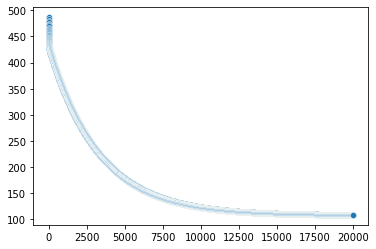

In [10]:
numEpochs= 20000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves calculations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise